In [16]:
import sys
from pathlib import Path

import os

import numpy as np

In [17]:
module_path = str(Path.cwd().parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

from dataloader import *
from plotCreator import *

In [18]:
data_path0 = str(Path.cwd().parents[0] / "data" / "bh" / "BH_n5_M8_res100_10000_events.h5")
data_path1 = str(Path.cwd().parents[0] / "data" / "sph" / "PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL_res100_10000_events.h5")

In [19]:
bhArray = dataToArray(data_path0)
sphArray = dataToArray(data_path1)

In [20]:
import fastai
from fastai.vision.all import *

In [21]:
def wrapper(image, lable):
    def pass_index(idx):
        return idx

    def get_x(i):
        return image[i]
    
    def get_y(i):
        return lable[i]

    db = DataBlock(
        blocks=(ImageBlock, CategoryBlock), 
        get_items = pass_index, 
        get_x = get_x, 
        get_y = get_y
    )

    num_images = image.shape[0]
    
    dls = db.dataloaders(list(range(num_images)),bs=64)
    

    return dls



In [47]:
#images
img = np.concatenate((bhArray, sphArray))

bhOnes = np.ones(len(bhArray))
sphZeros = np.zeros(len(sphArray))

#labels
label = np.concatenate((bhOnes, sphZeros))
imgNew = ((img - np.min(img)/(np.max(img)-np.min(img)))*255).astype(np.uint8)
dls = wrapper(imgNew, label)

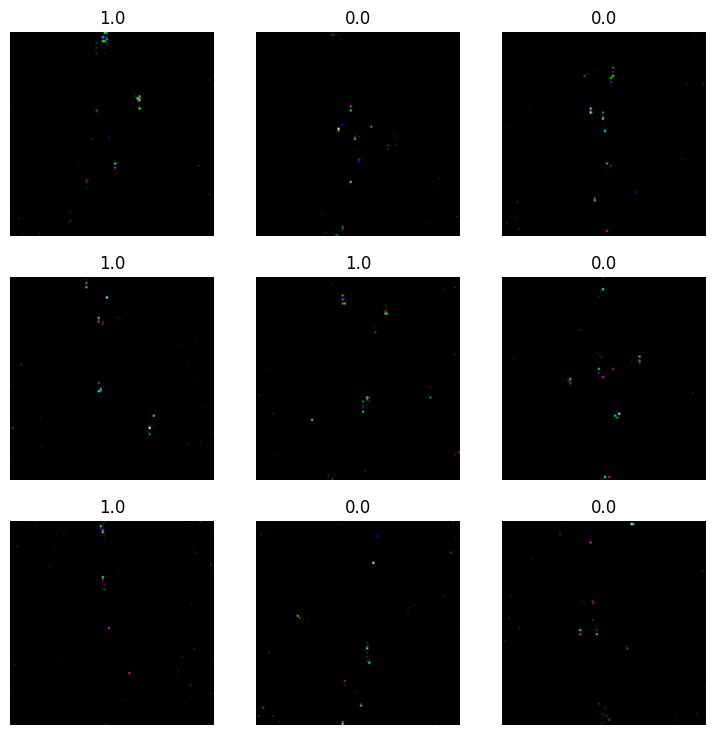

In [48]:
dls.show_batch(cmap='gray')

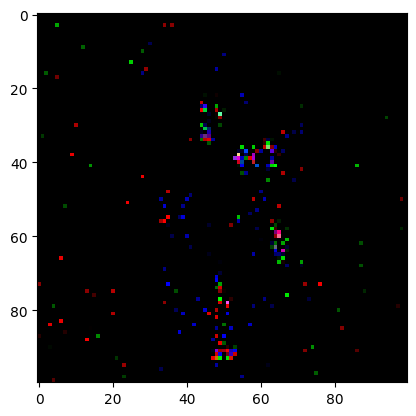

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


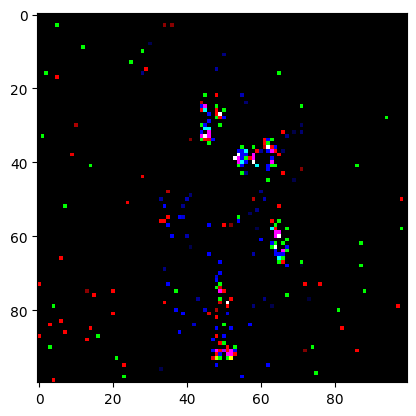

In [ ]:
standardPlot(imgNew[1])
standardPlot(img[1])


In [50]:
learner = vision_learner(dls, resnet18, metrics=accuracy)
learner.fine_tune(5)

c:\Users\student\Anaconda3\envs\DAT191\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\student\Anaconda3\envs\DAT191\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.613816,0.498586,0.758750,03:26


epoch,train_loss,valid_loss,accuracy,time
0,0.414492,0.390887,0.827250,04:33
1,0.348637,0.372261,0.831250,04:34
2,0.245077,0.383261,0.838000,04:59
3,0.073154,0.569867,0.835750,04:28
4,0.014461,0.626703,0.835250,04:26
